<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

###Problem 1

In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None

    def fit(self, X):
        """
        Calculate clustering by K-means

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for _ in range(self.n_init):
            initial_centroids_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            initial_centroids = X[initial_centroids_indices]



        if self.verbose:
            print("Initial centroids:", self.centroids)

        return self

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass

X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
n_clusters = 3
n_init = 3
max_iter = 300
tol = 1e-4
verbose = True

kmeans = ScratchKMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, verbose=verbose)
kmeans.fit(X)

Initial centroids: None


###Problem 2

In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None

    def fit(self, X):
        """
        Calculate clustering by K-means

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for _ in range(self.n_init):
            initial_centroids_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            initial_centroids = X[initial_centroids_indices]



        if self.verbose:
            print("Initial centroids:", self.centroids)

        return self

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass

    def calculate_sse(self, X, labels, centroids):
        """
        Calculate the Sum of Squared Errors (SSE) for the given clustering

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the data
        labels : ndarray, shape (n_samples,)
            Assigned cluster labels for each data point
        centroids : ndarray, shape (n_clusters, n_features)
            Centroids of the clusters

        Returns
        -------
        float
            The SSE value
        """
        sse = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            distances = np.sum((cluster_points - centroids[i])**2, axis=1)
            sse += np.sum(distances)
        return sse


labels = np.array([0, 1, 0, 1, 2, 2, 0, 1, 2])
centroids = np.array([[1, 2], [4, 5], [7, 8]])
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]])

kmeans = ScratchKMeans(n_clusters=3, n_init=3, max_iter=300, tol=1e-4, verbose=False)
sse = kmeans.calculate_sse(X, labels, centroids)
print("SSE:", sse)

SSE: 138


###Problem 3

In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None

    def fit(self, X):
        """
        Calculate clustering by K-means

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for _ in range(self.n_init):
            initial_centroids_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            initial_centroids = X[initial_centroids_indices]

            centroids = self._kmeans_algorithm(X, initial_centroids)


        if self.verbose:
            print("Initial centroids:", self.centroids)

        return self

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass

    def _kmeans_algorithm(self, X, centroids):
        """
        Perform the K-means algorithm with given initial centroids

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the data
        centroids : ndarray, shape (n_clusters, n_features)
            Initial centroids

        Returns
        -------
        ndarray, shape (n_clusters, n_features)
            Final centroids after clustering
        """
        for _ in range(self.max_iter):
            labels = self._assign_clusters(X, centroids)

            new_centroids = self._update_centroids(X, labels)

            if np.linalg.norm(new_centroids - centroids) < self.tol:
                break

            centroids = new_centroids

        return centroids

    def _assign_clusters(self, X, centroids):
        """
        Assign each data point to the closest centroid

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the data
        centroids : ndarray, shape (n_clusters, n_features)
            Current centroids

        Returns
        -------
        ndarray, shape (n_samples,)
            Assigned cluster labels for each data point
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)

        labels = np.argmin(distances, axis=1)

        return labels

    def _update_centroids(self, X, labels):
        """
        Update centroids based on the assigned clusters

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of the data
        labels : ndarray, shape (n_samples,)
            Assigned cluster labels for each data point

        Returns
        -------
        ndarray, shape (n_clusters, n_features)
            Updated centroids
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)

        return centroids

###Problem 4

In [ ]:
def _update_centroids(self, X, labels):
    """
    Update centroids based on the assigned clusters

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Features of the data
    labels : ndarray, shape (n_samples,)
        Assigned cluster labels for each data point

    Returns
    -------
    ndarray, shape (n_clusters, n_features)
        Updated centroids
    """
    centroids = np.zeros((self.n_clusters, X.shape[1]))
    for i in range(self.n_clusters):
        centroids[i] = np.mean(X[labels == i], axis=0)

    return centroids

###Problem 5

In [ ]:
def fit(self, X):
    """
    Fit K-means clustering to the data.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Features of the data

    Returns
    -------
    ndarray, shape (n_samples,)
        Cluster labels for each data point
    """
    best_centroids = None
    best_labels = None
    best_sse = float('inf')

    for _ in range(self.n_init):
        centroids = self._initialize_centroids(X)
        for _ in range(self.max_iter):
            labels = self._assign_clusters(X, centroids)

            new_centroids = self._update_centroids(X, labels)

            if np.linalg.norm(new_centroids - centroids) <= self.tol:
                break

            centroids = new_centroids

        sse = self._calculate_sse(X, labels, centroids)

        if sse < best_sse:
            best_sse = sse
            best_centroids = centroids
            best_labels = labels

    self.labels_ = best_labels
    self.cluster_centers_ = best_centroids

    if self.verbose:
        print("Converged after {} iterations.".format(_ + 1))

    return self

###Problem 6

In [ ]:
def fit(self, X):
    """
    Fit K-means clustering to the data.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Features of the data

    Returns
    -------
    ndarray, shape (n_samples,)
        Cluster labels for each data point
    """
    best_centroids = None
    best_labels = None
    best_sse = float('inf')

    for _ in range(self.n_init):
        centroids = self._initialize_centroids(X)
        for _ in range(self.max_iter):
            # Step 1: Assign data points to the closest centroids
            labels = self._assign_clusters(X, centroids)

            # Step 2: Update centroids based on the assigned clusters
            new_centroids = self._update_centroids(X, labels)

            if np.linalg.norm(new_centroids - centroids) <= self.tol:
                break

            centroids = new_centroids

        sse = self._calculate_sse(X, labels, centroids)

        if sse < best_sse:
            best_sse = sse
            best_centroids = centroids
            best_labels = labels

    self.labels_ = best_labels
    self.cluster_centers_ = best_centroids

    if self.verbose:
        print("Converged after {} iterations.".format(_ + 1))

    return self

###Problem 7

In [ ]:
def predict(self, X):
    """
    Predict the closest cluster each sample in X belongs to.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        New data points to be predicted.

    Returns
    -------
    ndarray, shape (n_samples,)
        Index of the cluster each sample belongs to.
    """
    distances = np.linalg.norm(X[:, np.newaxis, :] - self.cluster_centers_, axis=2)

    labels = np.argmin(distances, axis=1)

    return labels

###Problem 8

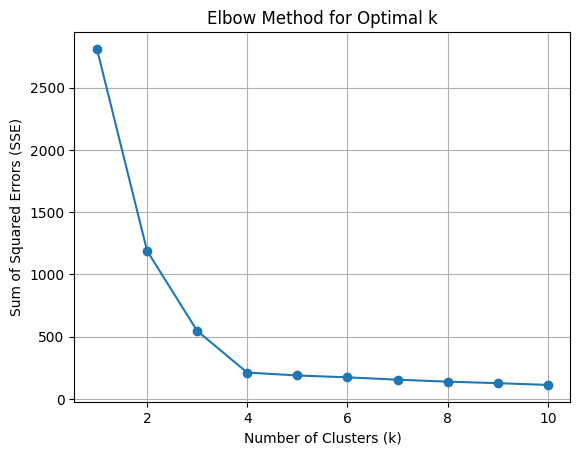

In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.cluster_centers_ = None
        self.labels_ = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        best_sse = float('inf')
        best_centers = None
        best_labels = None

        for _ in range(self.n_init):
            idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            cluster_centers = X[idx]

            for _ in range(self.max_iter):
                distances = np.linalg.norm(X[:, np.newaxis, :] - cluster_centers, axis=2)

                labels = np.argmin(distances, axis=1)

                new_centers = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

                if np.linalg.norm(new_centers - cluster_centers) < self.tol:
                    break

                cluster_centers = new_centers

            sse = np.sum(np.min(distances, axis=1) ** 2)

            if sse < best_sse:
                best_sse = sse
                best_centers = cluster_centers
                best_labels = labels

        self.cluster_centers_ = best_centers
        self.labels_ = best_labels

        if self.verbose:
            print(f"Best SSE: {best_sse}")

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

    def calculate_sse(self, X):
        """
        Calculate the sum of squared errors (SSE) for the current clustering.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        float
            Sum of squared errors (SSE).
        """
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.cluster_centers_, axis=2)
        min_distances = np.min(distances, axis=1)
        sse = np.sum(min_distances ** 2)
        return sse

    def elbow_method(self, X, max_clusters):
        """
        Apply the elbow method to determine the optimal number of clusters.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.
        max_clusters : int
            Maximum number of clusters to consider.

        Returns
        -------
        list
            SSE values for different numbers of clusters.
        """
        sse_values = []

        for k in range(1, max_clusters + 1):
            self.n_clusters = k
            self.fit(X)
            sse = self.calculate_sse(X)
            sse_values.append(sse)

        return sse_values

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=0)

kmeans = ScratchKMeans(n_clusters=3, n_init=10, max_iter=300, tol=1e-4)

max_clusters = 10
sse_values = kmeans.elbow_method(X, max_clusters)

plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()